# Prediksi Harga Rumah

**Install & Import Library**

Library `scikit-learn` digunakan untuk membuat model machine learning. Library ini menyediakan berbagai algoritma machine learning seperti Linear Regression, Decision Tree, Random Forest dan lain-lain.

In [1]:
# !pip install seaborn pandas scikit-learn

Sebelum mulai, kita perlu melakukan import library yang diperlukan.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load Persiapan Dataset

Dataset yang akan digunakan adalah dataset harga rumah yang telah dibersihkan.

In [3]:
df = pd.read_csv('harga_rumah_clean.csv')
df.head()

,Unnamed: 0,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
1,1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",4500.0,2500.0,12.0,8.0,5.0
2,2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",128.0,302.0,3.0,3.0,2.0
3,3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",518.0,450.0,5.0,6.0,5.0
4,4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",120.0,90.0,4.0,2.0,0.0


In [4]:
len(df)

1836

### Split Dataset

Kita perlu melakukan split dataset menjadi data training dan data testing. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk menguji performa model.

Umumnya, komposisi data training dan data testing adalah 80:20 atau 70:30. Atau bisa menyesuaikan dengan kebutuhan.

#### Memecah Dataset Menjadi Fitur dan Target

Tapi sebelum melakukan split dataset, kita akan memecah dataset tersebut menjadi fitur (X) dan target (y). Data target adalah harga rumah, sedangkan fitur adalah kolom lain (selain harga rumah) yang akan digunakan untuk memprediksi harga rumah seperti `area`, `building_area`,`bedrooms`, `bathrooms`, `garage`, dan lain-lain

In [5]:
# fitur
X = df[['area', 'building_area', 'bedrooms', 'bathrooms', 'garage']]
# target
y = df['price']

#### Membagi Dataset Menjadi Data Train dan Data Test

Langkah selanjutnya adalah membagi data menjadi data training dan data testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 1468
Test size: 368


## Membuat Model Linear Regression

Linear Regression adalah algoritma machine learning yang digunakan untuk membuat model regresi linear. Model regresi linear digunakan untuk memprediksi nilai target berdasarkan fitur-fitur yang diberikan.

Pada tutorial ini, kita akan menggunakan model Linear Regression untuk memprediksi harga rumah berdasarkan fitur-fitur di atas. Library yang digunakan adalah Scikit-Learn.

### Mendefinisikan Model Linear Regression

Untuk membuat model regresi linear, kita bisa menggunakan class `LinearRegression` dari Scikit-Learn.

In [7]:
model = LinearRegression()

Untuk melatih model tersebut, kita tinggal memanggil metode `fit` pada model. Metode ini membutuhkan dua parameter yaitu `X_train` dan `y_train`.

### Training Model

In [8]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Melakukan Prediksi

Setelah training, model dapat digunakan untuk membuat prediksi menggunakan fungsi `predict`. Fungsi ini membutuhkan 1 parameter yaitu data input yang akan diprediksi. Dalam hal ini, kita akan menggunakan `X_test` sebagai data input. Fungsi ini akan mengembalikan array hasil prediksi yang sesuai dengan ukuran `X_test`.

In [9]:
y_pred = model.predict(X_test)

Variabel `y_pred` menyimpan hasil prediksi model. Kita akan melihat beberapa data hasil prediksi untuk melihat secara sekilas performa dari model.

Melihat beberapa data prediksi

In [10]:
# melihat data hasil prediksi pada index-0, 5 dan 11
for i in [0, 5, 11]:
    print(f"Data test ke-{i+1}: \n{X_test.iloc[i]}")
    print(f"Hasil prediksi: {y_pred[i]}")
    print(f"Harga Asli: {y_test.iloc[i]}")
    print("---")

Data test ke-1: 
area             45.0
building_area    45.0
bedrooms          2.0
bathrooms         2.0
garage            0.0
Name: 614, dtype: float64
Hasil prediksi: -2542.824513279808
Harga Asli: 720.0
---
Data test ke-6: 
area              72.0
building_area    155.0
bedrooms           3.0
bathrooms          2.0
garage             0.0
Name: 1222, dtype: float64
Hasil prediksi: 739.2126761171276
Harga Asli: 1190.0
---
Data test ke-12: 
area             446.0
building_area    500.0
bedrooms           5.0
bathrooms          3.0
garage             3.0
Name: 618, dtype: float64
Hasil prediksi: 21116.709091703156
Harga Asli: 14500.0
---


Dari 3 hasil prediksi di atas, terlihat bahwa performa model masih kurang bagus. Terkadang ada prediksi yang mendekati nilai sebenarnya, tetapi ada juga yang jauh dari nilai sebenarnya.

### Evaluasi Model

Nah, sekarang kita akan coba untuk mengevaluasi model secara keseluruhan, tanpa harus mencoba prediksi satu per satu. Untuk task regressi, ada beberapa metrik evaluasi yang sering digunakan:

- **MAE (Mean Absolute Error)**: Rata-rata dari selisih antara prediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin baik model.
- **RMSE (Root Mean Squared Error)**: Akar dari rata-rata dari selisih antara prediksi dan nilai sebenarnya. Semakin kecil nilai RMSE, semakin baik model.

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 4061.3837000544563
MSE: 70076249.1032629


Dari hasil ini dapat kita simpulkan bahwa MAE dan MSE cukup besar. Bahkan pada MSE nilainya sangat besar. Hal ini terjadi karena MSE rentan terhadap outlier.

Kita akan coba memperbaiki hasil ini dengan cara memperbaiki data melalui teknik scaling dan normalisasi data.

## Feature Engineering

Dari hasil di atas dapat kita simpulkan bahwa MAE dan MSE cukup besar. Bahkan pada MSE nilainya sangat besar. Hal ini terjadi karena MSE rentan terhadap outlier.

Kita akan coba memperbaiki hasil ini dengan cara memperbaiki data melalui teknik scaling dan normalisasi data.

### Membuang Data Outlier

Sekarang, kita akan coba mengecek distribusi data untuk setiap kolom. Berikut adalah fungsi `check_distribution` untuk mengecek distribusi data.

In [12]:
def check_distribution(df, columns_to_plot):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):
        sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Kemudian, kita tinggal memanggil fungsi tersebut. Kita akan plot distribusi data untuk kolom `price`, `area`, `building_area`, `bedrooms`, `bathrooms`, dan `garage`.

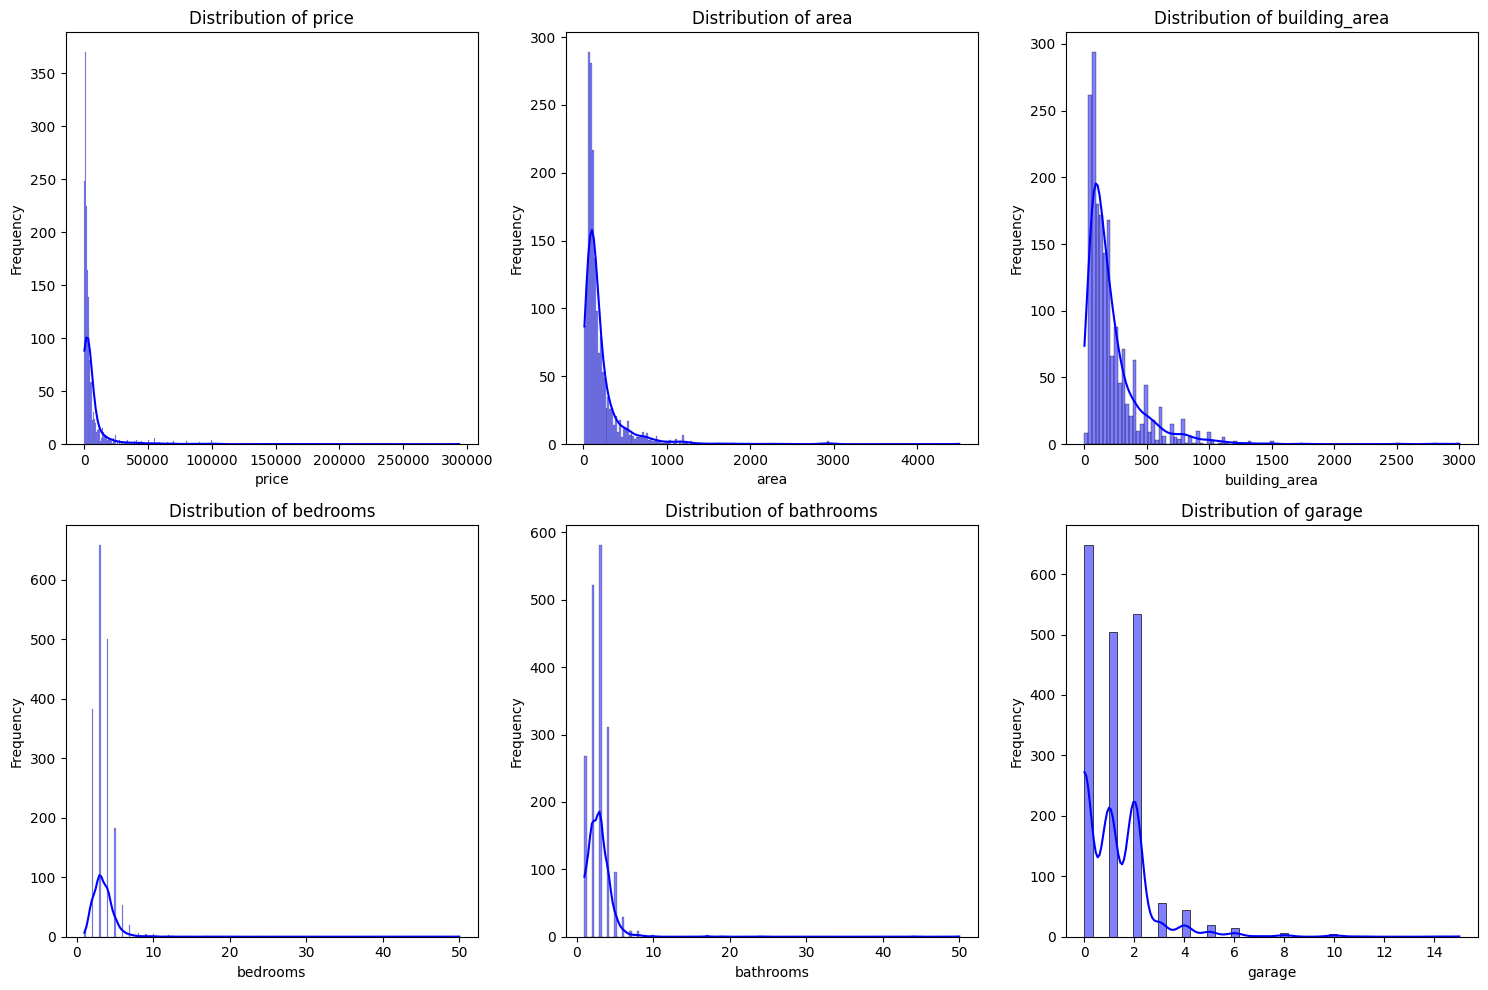

In [13]:
check_distribution(df, ['price', 'area', 'building_area', 'bedrooms', 'bathrooms', 'garage'])

Dari data di atas, terlihat bahwa data rumah di atas 20M jumlahnya sangat sedikit. Data2 ini bisa mempengaruhi model regresi. Rata2 harga rumah berkisar di bawah harga ini. Kita akan coba mengecek data di atas 20M.

In [14]:
# cari data rumah dengan price di atas 20M
df[df['price'] > 20000]

,Unnamed: 0,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
1,1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",4500.0,2500.0,12.0,8.0,5.0
8,8,Jakarta Selatan,"Dijual Rumah Hitung Tanah Harga Dibawah Njop,...",21500.0,"Kebayoran Lama, Jakarta Selatan",1322.0,500.0,5.0,3.0,0.0
9,9,Jakarta Selatan,Dijual Cepat Perumahan Mewah Simprug Jak-Sel,25000.0,"Simprug, Jakarta Selatan",662.0,500.0,4.0,4.0,1.0
13,13,Jakarta Selatan,Rumah 2 Lantai Simprug Golf Siap Huni Ada Tama...,45000.0,"Senayan, Jakarta Selatan",712.0,500.0,6.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1392,1526,Tangerang,"Rumah Mewah Rasa Villa, View Golf Di Paramoun...",33500.0,"Gading Serpong, Tangerang",1104.0,695.0,4.0,4.0,0.0
1398,1532,Tangerang,Rumah Mewah Furnished Siap Huni Lyndon Navapar...,32000.0,"BSD City, Tangerang",495.0,545.0,5.0,7.0,2.0
1422,1558,Tangerang,"Rumah Mewah Terrace Golf Resort Concept, Open...",27000.0,"BSD, Tangerang",782.0,1139.0,5.0,8.0,2.0
1423,1559,Tangerang,"Rumah Mewah Sultan Laurel Nava Park, Baru Ren...",21500.0,"BSD City, Tangerang",368.0,445.0,5.0,5.0,2.0


Datanya berjumlah 104. Kita akan membuang data ini dan fokus pada data rumah dengan harga di bawah 20M.

In [15]:
# Buang data rumah dengan price di atas 20M
df_no_outlier = df[df['price'] <= 20000]
len(df_no_outlier)

1717

Setelah itu, kita coba cek kembali distribusi datanya.

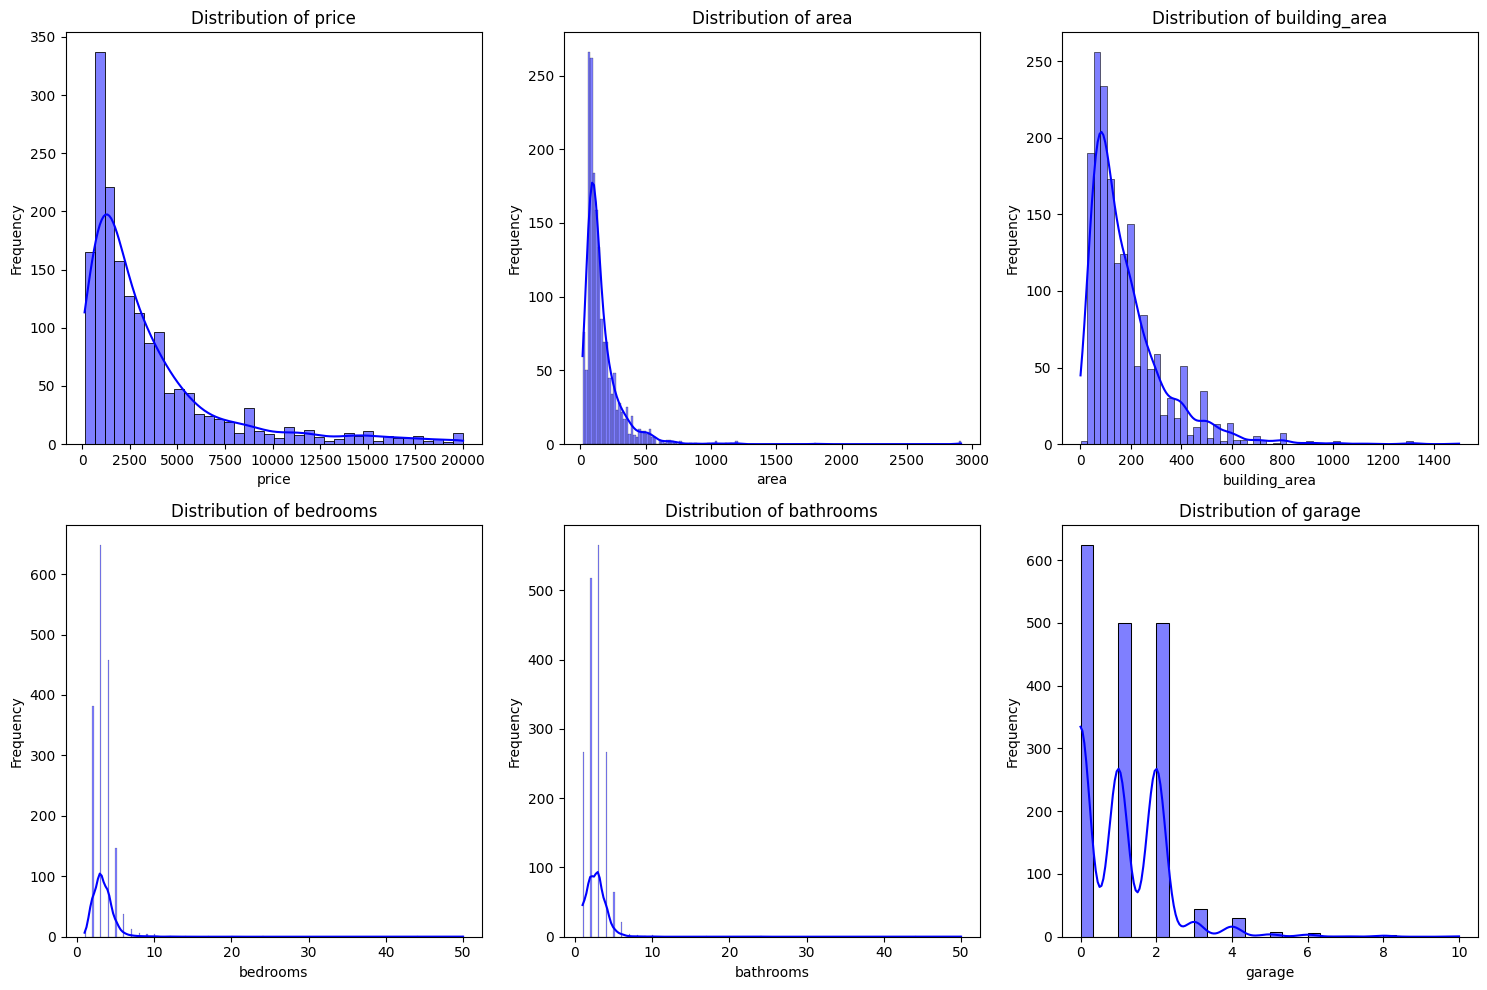

In [16]:
check_distribution(df_no_outlier, ['price', 'area', 'building_area', 'bedrooms', 'bathrooms', 'garage'])

### Scaling dan Normalisasi Data

Scaling dan normalisasi data adalah teknik yang digunakan untuk mengubah skala data agar memiliki rentang yang sama. Fitur yang tidak berada pada rentang yang sama akan mempengaruhi performa model.

Sekarang kita akan menormalisasi kolom numerik, yaitu `price`, `area`, `building_area`. Scikit-learn menyediakan class StandardScaler untuk melakukan normalisasi. Untuk `bedrooms`, `bathrooms`, dan `garage` sebenernya adalah data kategorikal, jadi kita akan handling dengan cara berbeda.

In [17]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
price_scaler = StandardScaler()

df_normalized = df_no_outlier.copy()
df_normalized[['area', 'building_area']] = feature_scaler.fit_transform(df_normalized[['area', 'building_area']])
df_normalized[['price']] = price_scaler.fit_transform(df_normalized[['price']])

Berikut adalah hasil setelah normalisasi. Terlihat bahwa, nilai-nilai pada fitur-fitur tersebut sudah berada dalam rentang yang kecil. Rentang data ini lebih safe untuk machine learning.

In [18]:
df_normalized[['price', 'area', 'building_area']]

,price,area,building_area
2,1.153898,-0.206015,0.784900
3,2.886582,2.100714,1.749745
4,-0.137070,-0.253333,-0.597175
5,0.191588,-0.211930,0.641477
6,-0.695788,-0.738337,-0.662368
...,...,...,...
1831,-0.084484,-0.004916,-0.212541
1832,-0.176509,-0.253333,-0.453752
1833,-0.715770,-0.075892,-0.401599
1834,-0.775980,-0.572726,-0.857944


### Encode Categorical Data

Kolom `bedrooms`, `bathrooms`, dan `garage` adalah kolom kategorikal. Walaupun tipe datanya adalah numerik, namun secara fungsional ini adalah kategorikal. Untuk data kategorikal, best practice adalah mengubahnya menjadi one-hot encoding sehingga lebih mudah untuk diinterpretasikan oleh model.

Pandas memiliki metode `get_dummies` yang dapat digunakan untuk melakukan one-hot encoding. Bersama dengan kolom `city`, kita akan melakukan one-hot encoding pada kolom-kolom tersebut.

In [19]:
df_one_hot = df_normalized.copy()

df_one_hot = pd.get_dummies(df_one_hot, columns=['city'], prefix='City')
df_one_hot = pd.get_dummies(df_one_hot, columns=['bedrooms'], prefix='Bedroom')
df_one_hot = pd.get_dummies(df_one_hot, columns=['bathrooms'], prefix='Bathroom')
df_one_hot = pd.get_dummies(df_one_hot, columns=['garage'], prefix='Garage')

df_one_hot.columns

Index(['Unnamed: 0', 'title', 'price', 'location', 'area', 'building_area',
       'City_Bekasi', 'City_Bogor', 'City_Depok', 'City_Jakarta Barat',
       'City_Jakarta Pusat', 'City_Jakarta Selatan', 'City_Jakarta Timur',
       'City_Jakarta Utara', 'City_Tangerang', 'City_Tangerang Selatan',
       'Bedroom_1.0', 'Bedroom_2.0', 'Bedroom_3.0', 'Bedroom_4.0',
       'Bedroom_5.0', 'Bedroom_6.0', 'Bedroom_7.0', 'Bedroom_8.0',
       'Bedroom_9.0', 'Bedroom_10.0', 'Bedroom_12.0', 'Bedroom_14.0',
       'Bedroom_17.0', 'Bedroom_20.0', 'Bedroom_24.0', 'Bedroom_44.0',
       'Bedroom_50.0', 'Bathroom_1.0', 'Bathroom_2.0', 'Bathroom_3.0',
       'Bathroom_4.0', 'Bathroom_5.0', 'Bathroom_6.0', 'Bathroom_7.0',
       'Bathroom_8.0', 'Bathroom_9.0', 'Bathroom_10.0', 'Bathroom_17.0',
       'Bathroom_24.0', 'Bathroom_44.0', 'Bathroom_50.0', 'Garage_0.0',
       'Garage_1.0', 'Garage_2.0', 'Garage_3.0', 'Garage_4.0', 'Garage_5.0',
       'Garage_6.0', 'Garage_7.0', 'Garage_8.0', 'Garage_10.0'],


Terlihat bahwa, kolom dari DataFrame kita sekarang bertambah banyak. Hal ini terjadi karena setiap kategori dari kolom kategorikal akan diubah menjadi kolom baru. Masing-masing kolom baru akan diisi dengan 0 (`False`) atau 1 (`True`), menunjukkan apakah suatu baris termasuk dalam kategori tersebut atau tidak.

Kita akan coba lihat isi dari kolom `City_Depok` dan `City_Bogor`

In [20]:
df_one_hot[['City_Depok', 'City_Bogor']]

,City_Depok,City_Bogor
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
...,...,...
1831,False,False
1832,False,False
1833,False,False
1834,False,False


### Split Ulang Data

Oke, setelah kita melakukan beberapa teknik feature engineering, kita perlu melakukan split data menjadi train dan test set, seperti yang sudah kita lakukan sebelumnya.

In [21]:
# pecah menjadi fitur dan target
X2 = df_one_hot.drop(columns=['Unnamed: 0', 'title', 'price', 'location'])
y2 = df_one_hot['price']

# split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(f"Train size: {len(X2_train)}")
print(f"Test size: {len(X2_test)}")

Train size: 1373
Test size: 344


## Kembali Membuat Model

### Linear Regression

Membuat model Linear Regression

In [22]:
# define model
model = LinearRegression()
# training
model.fit(X2_train, y2_train)
# prediksi
y2_pred = model.predict(X2_test)

Evaluasi model Linear Regression

In [23]:
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# regresi ==> output numerik (mae, mse, r2)
# klasifikasi ==> output class (akurasi, F1, recall, presisi, confusion matrix)
# image genertion ==> metric

MAE: 0.3056338816348466
MSE: 0.23443105923313884


### Lasso Regression

Membuat model Lasso Regression

In [24]:
# defisini model
lasso_model = Lasso(alpha=0.01)
# training
lasso_model.fit(X2_train, y2_train)
#prediksi
y2_pred = lasso_model.predict(X2_test)

Evaluasi model Lasso Regression

In [25]:
# Evaluasi
mae_lasso = mean_absolute_error(y2_test, y2_pred)
mse_lasso = mean_squared_error(y2_test, y2_pred)

# Cetak hasilnya
print(f"MAE: {mae_lasso}")
print(f"MSE: {mse_lasso}")

MAE: 0.2995261539628573
MSE: 0.24104241956467526


### Ridge Regression

Membuat model Ridge Regression

In [26]:
# definisi model
ridge_model = Ridge(alpha=10)
# training
ridge_model.fit(X2_train, y2_train)
# prediksi
y2_pred = ridge_model.predict(X2_test)

Evaluasi model Ridge Regression

In [27]:
# Evaluasi
mae_ridge = mean_absolute_error(y2_test, y2_pred)
mse_ridge = mean_squared_error(y2_test, y2_pred)

# Cetak hasilnya
print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")

# k-fold validation

MAE: 0.29923598816663644
MSE: 0.22979551915174395


### Random Forest Regressor

Membuat model Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

# definisi model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=1
)

# training
rf_model.fit(X2_train, y2_train)
# prediksi
y2_pred = rf_model.predict(X2_test)

Evaluasi model Random Forest Regressor

In [29]:
# Evaluasi model
mae_rf = mean_absolute_error(y2_test, y2_pred)
mse_rf = mean_squared_error(y2_test, y2_pred)

print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")

MAE: 0.23589586309020041
MSE: 0.19617128008331994


### Neural Network (Jaringan Syaraf Tiruan)

Membuat model Neural Network

In [30]:
from sklearn.neural_network import MLPRegressor

# inisialisasi model
nn_model = MLPRegressor(
    hidden_layer_sizes=(150, ), # jumlah hidden layer
    max_iter=1000, # maksimum iterasi
    random_state=42,
    solver='adam' # fungsi aktivasi
)

# train model
nn_model.fit(X2_train, y2_train)

# prediksi
y2_pred = nn_model.predict(X2_test)

Evaluasi model Neural Network

In [31]:
# evaluasi model
mae_nn = mean_absolute_error(y2_test, y2_pred)
mse_nn = mean_squared_error(y2_test, y2_pred)

print(f"MAE: {mae_nn}")
print(f"MSE: {mse_nn}")

MAE: 0.27982032551915553
MSE: 0.2695605952684292


## Menyimpan Model

In [32]:
import joblib
import os

# bikin folder
os.makedirs('models', exist_ok=True)
features = X2.columns.tolist()

# simpan koloms list
joblib.dump(features, "models/feature_columns.pkl")
# simpan scaler
joblib.dump(feature_scaler, "models/feature_scaler.pkl")
joblib.dump(price_scaler, "models/price_scaler.pkl")
# simpan model
joblib.dump(rf_model, "models/random_forest_regressor_model.pkl")

print('Models saved successfully')


Models saved successfully


`note`: this notebook copied from Rumah Coding Open Asset